In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv("/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv")

In [4]:
df.shape

(20718, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [6]:
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20713    False
20714    False
20715    False
20716    False
20717    False
Length: 20718, dtype: bool

In [8]:
df.isnull().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [9]:
df.nunique()

Unnamed: 0          20718
Artist               2079
Url_spotify          2079
Track               17841
Album               11937
Album_type              3
Uri                 18862
Danceability          898
Energy               1268
Key                    12
Loudness             9417
Speechiness          1303
Acousticness         3138
Instrumentalness     4012
Liveness             1536
Valence              1293
Tempo               15024
Duration_ms         14690
Url_youtube         18154
Title               18146
Channel              6714
Views               19245
Likes               17939
Comments            10485
Description         17395
Licensed                2
official_video          2
Stream              18461
dtype: int64

In [10]:
df.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [11]:
df.transpose()


,0,1,2,3,4,5,6,7,8,9,...,20708,20709,20710,20711,20712,20713,20714,20715,20716,20717
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,20708,20709,20710,20711,20712,20713,20714,20715,20716,20717
Artist,Gorillaz,Gorillaz,Gorillaz,Gorillaz,Gorillaz,Gorillaz,Gorillaz,Gorillaz,Gorillaz,Gorillaz,...,SICK LEGEND,SICK LEGEND,SICK LEGEND,SICK LEGEND,SICK LEGEND,SICK LEGEND,SICK LEGEND,SICK LEGEND,SICK LEGEND,SICK LEGEND
Url_spotify,https://open.spotify.com/artist/3AA28KZvwAUcZu...,https://open.spotify.com/artist/3AA28KZvwAUcZu...,https://open.spotify.com/artist/3AA28KZvwAUcZu...,https://open.spotify.com/artist/3AA28KZvwAUcZu...,https://open.spotify.com/artist/3AA28KZvwAUcZu...,https://open.spotify.com/artist/3AA28KZvwAUcZu...,https://open.spotify.com/artist/3AA28KZvwAUcZu...,https://open.spotify.com/artist/3AA28KZvwAUcZu...,https://open.spotify.com/artist/3AA28KZvwAUcZu...,https://open.spotify.com/artist/3AA28KZvwAUcZu...,...,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,https://open.spotify.com/artist/3EYY5FwDkHEYLw...
Track,Feel Good Inc.,Rhinestone Eyes,New Gold (feat. Tame Impala and Bootie Brown),On Melancholy Hill,Clint Eastwood,DARE,New Gold (feat. Tame Impala and Bootie Brown) ...,She's My Collar (feat. Kali Uchis),Cracker Island (feat. Thundercat),Dirty Harry,...,PART OF ME HARDSTYLE (SPED UP),SUMMER TIME SADNESS HARDSTYLE,PART OF ME HARDSTYLE,MIDDLE OF THE NIGHT - HARDSTYLE REMIX,EVERYTIME WE TOUCH HARDSTYLE (SPED UP),JUST DANCE HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,OUTSIDE HARDSTYLE SPED UP,ONLY GIRL HARDSTYLE,MISS YOU HARDSTYLE
Album,Demon Days,Plastic Beach,New Gold (feat. Tame Impala and Bootie Brown),Plastic Beach,Gorillaz,Demon Days,New Gold (feat. Tame Impala and Bootie Brown) ...,Humanz (Deluxe),Cracker Island (feat. Thundercat),Demon Days,...,PART OF ME HARDSTYLE (SPED UP),SUMMER TIME SADNESS HARDSTYLE,PART OF ME HARDSTYLE,MIDDLE OF THE NIGHT - HARDSTYLE REMIX,EVERYTIME WE TOUCH HARDSTYLE (SPED UP),JUST DANCE HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,OUTSIDE HARDSTYLE SPED UP,ONLY GIRL HARDSTYLE,MISS YOU HARDSTYLE
Album_type,album,album,single,album,album,album,single,album,single,album,...,single,single,single,single,single,single,single,single,single,single
Uri,spotify:track:0d28khcov6AiegSCpG5TuT,spotify:track:1foMv2HQwfQ2vntFf9HFeG,spotify:track:64dLd6rVqDLtkXFYrEUHIU,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,spotify:track:7yMiX7n9SBvadzox8T5jzT,spotify:track:4Hff1IjRbLGeLgFgxvHflk,spotify:track:2c3KCGq6UojB2c8UAFrRON,spotify:track:3lIxtCaROdRDuTnNBDm3n2,spotify:track:2W3ZpQg9i6lE6kmHbcdu9N,spotify:track:2bfGNzdiRa1jXZRdfssSzR,...,spotify:track:6jkEAxBnX2PVchKYH9Y46D,spotify:track:3P48rdupp9trbMA2J2Vsta,spotify:track:19gnl7xN5xAEwDquLNKl76,spotify:track:4pqAkUZlA17gsTxFjP4BDL,spotify:track:2dSNs47vHBSPnsUwpl39nk,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,spotify:track:4jk00YxPtPbhvHJE9N4ddv,spotify:track:5EyErbpsugWliX006eTDex,spotify:track:6lOn0jz1QpjcWeXo1oMm0k
Danceability,0.818,0.676,0.695,0.689,0.663,0.76,0.716,0.726,0.741,0.625,...,0.642,0.49,0.519,0.292,0.554,0.582,0.531,0.443,0.417,0.498
Energy,0.705,0.703,0.923,0.739,0.694,0.891,0.897,0.815,0.913,0.877,...,0.949,0.824,0.902,0.692,0.874,0.926,0.936,0.83,0.767,0.938
Key,6.0,8.0,1.0,2.0,10.0,11.0,4.0,11.0,2.0,10.0,...,10.0,1.0,7.0,2.0,1.0,5.0,4.0,4.0,9.0,6.0


In [12]:
df.columns


Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [13]:
df.drop(['Unnamed: 0','Url_spotify','Uri', 'Url_youtube', 'Title', 'Description'],axis =1, inplace = True)

In [14]:
df.dropna(inplace = True)

In [15]:
df.isnull().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
dtype: int64

In [16]:
df["Album_type"].value_counts()

album          14148
single          4689
compilation      712
Name: Album_type, dtype: int64

In [17]:
df["Artist"].value_counts()

Gorillaz            10
Sam Smith           10
G-Eazy              10
Bomba Estéreo       10
Bonez MC            10
                    ..
The Cure             1
Simone & Simaria     1
Zion & Lennox        1
Hector & Tito        1
Pink Floyd           1
Name: Artist, Length: 2040, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19549 entries, 0 to 20717
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19549 non-null  object 
 1   Track             19549 non-null  object 
 2   Album             19549 non-null  object 
 3   Album_type        19549 non-null  object 
 4   Danceability      19549 non-null  float64
 5   Energy            19549 non-null  float64
 6   Key               19549 non-null  float64
 7   Loudness          19549 non-null  float64
 8   Speechiness       19549 non-null  float64
 9   Acousticness      19549 non-null  float64
 10  Instrumentalness  19549 non-null  float64
 11  Liveness          19549 non-null  float64
 12  Valence           19549 non-null  float64
 13  Tempo             19549 non-null  float64
 14  Duration_ms       19549 non-null  float64
 15  Channel           19549 non-null  object 
 16  Views             19549 non-null  float6

In [19]:
grouped = df.groupby("Channel")["Artist"].value_counts().sort_values(ascending = False)
grouped.head(20)

Channel                             Artist                 
RodWave                             Rod Wave                   10
JonPardiVEVO                        Jon Pardi                  10
Super Simple Songs - Kids Songs     Super Simple Songs         10
HueyLewisTheNewsVEVO                Huey Lewis & The News      10
Linkin Park                         Linkin Park                10
Red Hot Chili Peppers               Red Hot Chili Peppers      10
PinkVEVO                            P!nk                       10
The Kiboomers - Kids Music Channel  The Kiboomers              10
Shinedown                           Shinedown                  10
EarthWindandFireVEVO                Earth, Wind & Fire         10
ImagineDragonsVEVO                  Imagine Dragons            10
EUROPA Hörspiele                    Die drei !!!               10
Bethel Music                        Bethel Music               10
Epitaph Records                     Falling In Reverse         10
MoratVEVO       

In [20]:
grouped1 = df.groupby("Channel")["Album"].value_counts().sort_values(ascending = False)
grouped1.head(20)

Channel                   Album                                                
MetroBoominVEVO           HEROES & VILLAINS                                        18
Orochi                    Vida Cara                                                18
Latin Waves               Color Esperanza 2020                                     18
2115 GANG                 RODZINNY BIZNES                                          17
Bruno Mars                An Evening With Silk Sonic                               16
Stones Throw              Madvillainy                                              15
Catheleya R               El Ultimo Adiós                                          13
Sir Simon Rattle - Topic  Tchaikovsky: The Nutcracker                              13
TheFugeesVEVO             The Score (Expanded Edition)                             13
Macklemore                The Heist                                                12
GeolierVEVO               IL CORAGGIO DEI BAMBINI           

In [21]:
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Channel', 'Views',
       'Likes', 'Comments', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [22]:
grouped2 = df.groupby("Channel")["Album_type"].value_counts().sort_values(ascending = False)
grouped2.head(20)

Channel              Album_type 
T-Series             single         128
                     album           84
SonyMusicIndiaVEVO   album           69
SonyMusicSouthVEVO   album           67
RHINO                album           53
YRF                  album           39
SMTOWN               album           38
Zee Music Company    single          35
GR6 EXPLODE          single          34
Atlantic Records     album           30
Warner Music México  album           30
Sony Music India     single          28
Lyrical Lemonade     album           28
Rancho Humilde       single          28
DisneyMusicVEVO      compilation     27
EUROPA Hörspiele     album           27
Fueled By Ramen      album           26
PopArt Discos        album           26
T-Series             compilation     25
Spinnin' Records     single          25
Name: Album_type, dtype: int64

* views on Average mean on yt & spotify
* inki rating kar sakte hain
* max likes
* max comments
* max views
* top 10 albums
* top 10 channels
* top 10 songs
* 

In [23]:
grouped3 = df.groupby("Album_type")["Channel"].value_counts().sort_values(ascending = False)
grouped3


Album_type  Channel            
single      T-Series               128
album       T-Series                84
            SonyMusicIndiaVEVO      69
            SonyMusicSouthVEVO      67
            RHINO                   53
                                  ... 
            Rudmen                   1
            Ruben Samuel Cortez      1
            RuSoIGGG                 1
            Roy Orbison              1
single      𝙖𝙙𝙧𝙚𝙣𝙖𝙡𝙞𝙣𝙣               1
Name: Channel, Length: 7639, dtype: int64

In [24]:
artist_stats = df.groupby('Artist').agg({
    'Views': 'mean',
    'Likes': 'mean',
    'Comments': 'mean'
})
artist_stats.head(10).sort_values(by="Views", ascending=False)


,Views,Likes,Comments
Artist,,,
(G)I-DLE,175495394.1,2446296.3,145624.6
*NSYNC,102783286.2,423342.3,22526.7
2 Chainz,89836823.6,668285.8,21276.8
$uicideboy$,33413510.8,357662.1,6512.7
112,21913445.9,150914.1,3569.6
21 Savage,17182285.0,282495.1,7173.4
$NOT,11078490.3,274716.3,8149.7
070 Shake,9609935.9,201300.5,4136.6
1nonly,8792951.4,165309.3,3075.3


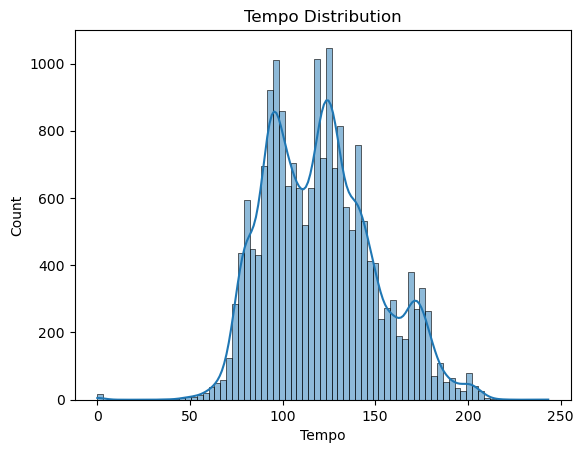

In [25]:
sns.histplot(df['Tempo'],kde =True)
plt.title('Tempo Distribution')
plt.xlabel('Tempo')
plt.show()


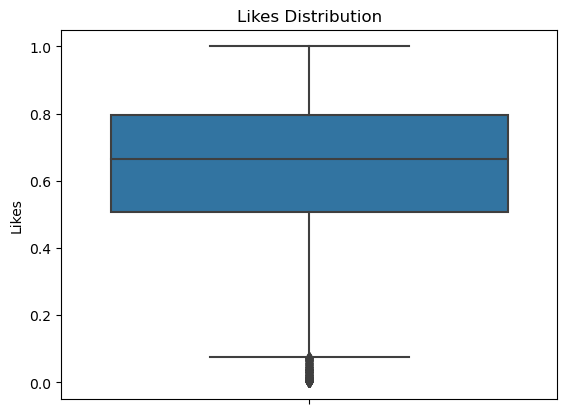

In [26]:
sns.boxplot(y='Energy', data=df)
plt.title('Likes Distribution')
plt.ylabel('Likes')
plt.show()



In [27]:
album_type_count = df['Album_type'].value_counts()
print(album_type_count)

album          14148
single          4689
compilation      712
Name: Album_type, dtype: int64


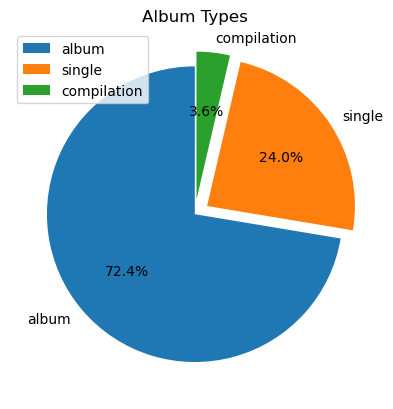

In [28]:
# Create a pie chart

labels = album_type_count.index.tolist()
sizes = album_type_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode = [0,0.1,0.1])

plt.title('Album Types')
plt.legend(labels, loc='best')

plt.show()

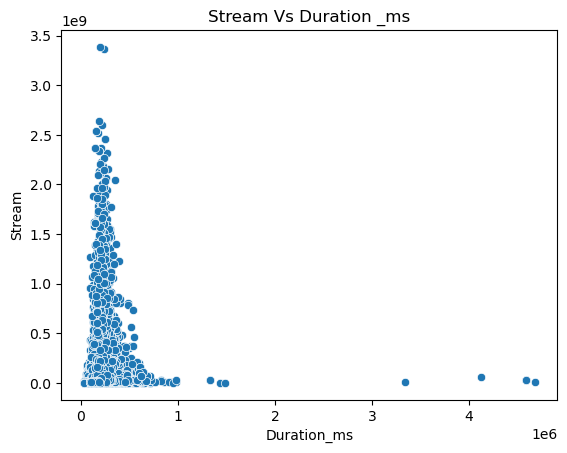

In [29]:
sns.scatterplot(x='Duration_ms', y='Stream', data=df)
plt.title('Stream Vs Duration _ms')
plt.xlabel('Duration_ms')
plt.ylabel('Stream')
plt.show()


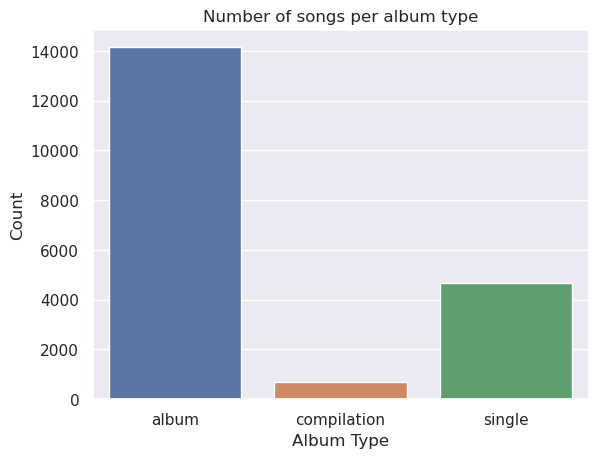

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

album_type_count = df.groupby('Album_type').count()['Artist'].reset_index(name='count')
sns.barplot(x='Album_type', y='count', data=album_type_count)
plt.title('Number of songs per album type')
plt.xlabel('Album Type')
plt.ylabel('Count')
plt.show()


In [31]:
Social_count = df['Licensed'].value_counts()
print(Social_count)

True     13727
False     5822
Name: Licensed, dtype: int64


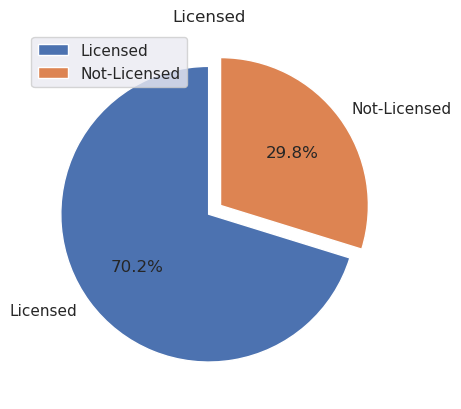

In [32]:

#labels = Social_count.index.tolist()
labels = ["Licensed","Not-Licensed"]
sizes = Social_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode = [0,0.1])

plt.title('Licensed')
plt.legend(labels)

plt.show()

In [33]:
album_type_count = df['Album_type'].value_counts()
print(album_type_count)


album          14148
single          4689
compilation      712
Name: Album_type, dtype: int64


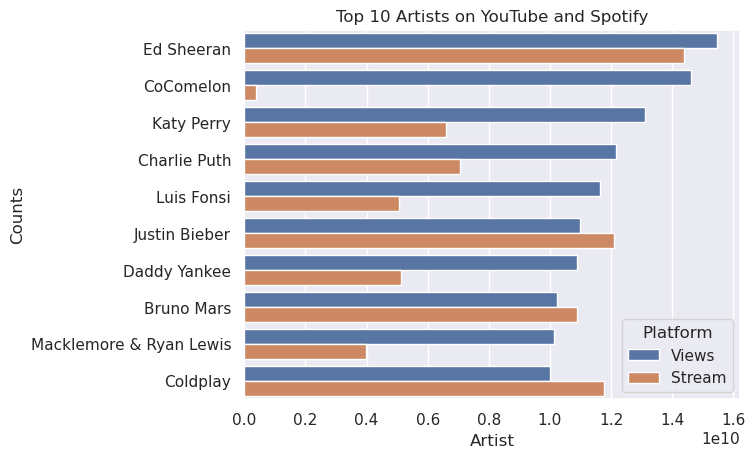

In [34]:
# group by artist and sum the views and streams
df_grouped = df.groupby('Artist')[['Views', 'Stream']].sum().reset_index()

# sort the data by views in descending order
df_grouped = df_grouped.sort_values(by='Views', ascending=False)[:10]

# melt the data to create a long format
df_melted = pd.melt(df_grouped, id_vars=['Artist'], var_name='Platform', value_name='Counts')

# create a grouped barplot
sns.barplot(y='Artist', x='Counts', hue='Platform', data=df_melted, orient = 'h')
plt.xticks(rotation=0)
plt.xlabel('Artist')
plt.ylabel('Counts')
plt.title('Top 10 Artists on YouTube and Spotify')
plt.show()

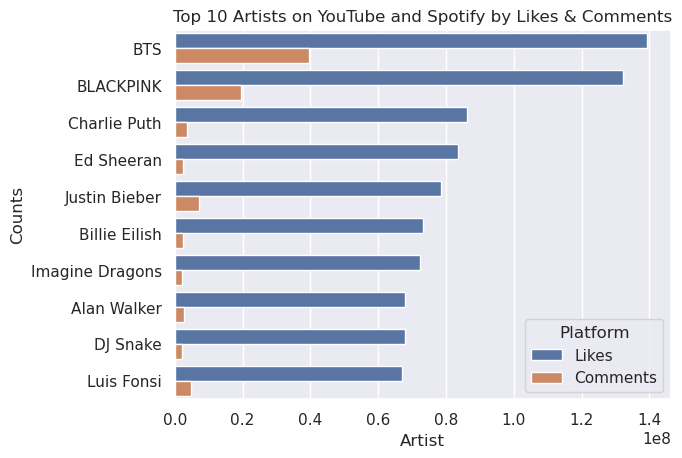

In [35]:
# group by artist and sum the views and streams
df_grouped = df.groupby('Artist')[['Likes', 'Comments']].sum().reset_index()

# sort the data by views in descending order
df_grouped = df_grouped.sort_values(by='Likes', ascending=False)[:10]

# melt the data to create a long format
df_melted = pd.melt(df_grouped, id_vars=['Artist'], var_name='Platform', value_name='Counts')

# create a grouped barplot
sns.barplot(y='Artist', x='Counts', hue='Platform', data=df_melted, orient = 'h')
plt.xticks(rotation=0)
plt.xlabel('Artist')
plt.ylabel('Counts')
plt.title('Top 10 Artists on YouTube and Spotify by Likes & Comments')
plt.show()